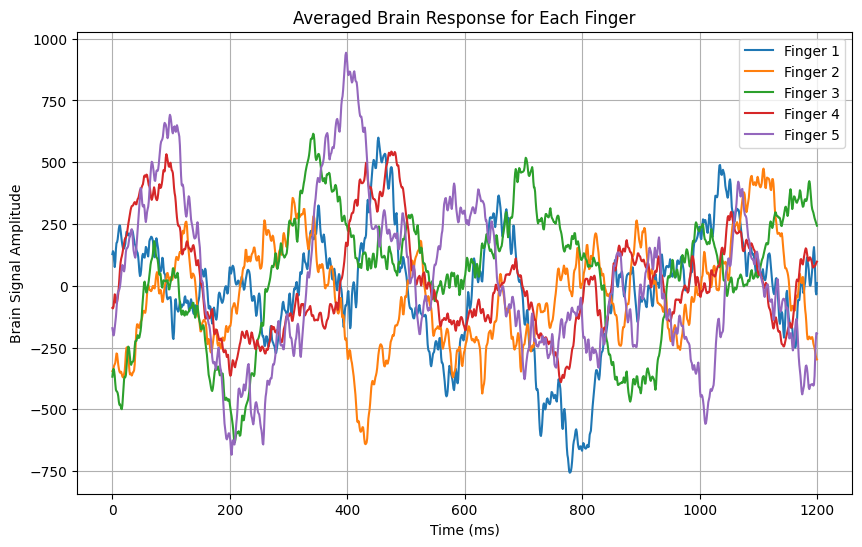

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points, ecog_data):
    '''
    accepts: 'trial_points', 'ecog_data' - .csv files which have been read 
    args within them: a starting point, peak point and finger number
    returns: a 5x1021 matrix of the average brain signal data of each finger
    '''
    
    # making a dictionary of empty lists to store data for each finger
    fingers_erp = {1: [], 2: [], 3: [], 4: [], 5: []}
    
    # running through each trial of the trials
    for _, row in trial_points.iterrows():
        start_point = int(row.iloc[0])  # making sure the data is in int form at the starting point
        peak = int(row.iloc[1])         # at the peak
        finger = int(row.iloc[2])       # as well as at the finger number

        start_idx = start_point - 200  # using the info we were given - 200 ms before the start point
        end_idx = start_point + 1000   # 1000 ms after the start point
        
        # making sure that the indices are ints within the limit we set
        start_idx = int(start_idx)
        end_idx = int(end_idx)
    
        # handling possible outliers 
        if start_idx < 0:
            start_idx = 0
        if end_idx >= len(ecog_data):
            end_idx = len(ecog_data) - 1
        
        signal_segment = ecog_data.iloc[start_idx:end_idx + 1].values.flatten()
        if np.any(np.isnan(signal_segment)):  # checking for nans
            continue      # ignoring the nans
        fingers_erp[finger].append(signal_segment)  # appending the signal segment for each finger
    
    # finding the average ERP for each finger
    fingers_erp_mean = np.zeros((5, 1201))  # building an empty matrix (5 fingers x 1201 time points)
    for finger in range(1, 6):
        # average for the finger
        fingers_erp_mean[finger - 1, :] = np.mean(fingers_erp[finger], axis=0)
    
    # plotting the matrix visually
    plt.figure(figsize=(10, 6))
    for finger in range(1, 6):
        plt.plot(fingers_erp_mean[finger - 1, :], label=f'Finger {finger}')
    
    plt.title('Averaged Brain Response for Each Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Signal Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # returning the matrix 
    return fingers_erp_mean

# reading the csv files we were given
trial_points = pd.read_csv('C:/Users/Owner/Desktop/advancedpython/miniproj2/mini2/data/events_file_ordered.csv')
ecog_data = pd.read_csv('C:/Users/Owner/Desktop/advancedpython/miniproj2/mini2/data/brain_data_channel_one.csv')

fingers_erp_mean = calc_mean_erp(trial_points, ecog_data)
